### Spectral Angle Mapper

Concept of SAM:
1) Each image can be "flattened" into a long vector with N = n x m, where n x m is image size in pixels.
2) To compare two images, we treat each flattened image as a vector in a very high-dimensional space.
3) The goal is to measure the angle between these two vectors.
4) If two images are exactly the same, the vectors will point in the same direction, and the angle between them will be 0.
5) If the images are completely different, the vectors will point in opposite directions, and the angle will be π (180 degrees).
6) Cosime similarty is used to measure the "closeness" of the vectors in a high dimensional space.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [131]:
img1 = cv2.imread('images/messi.png')
img2 = cv2.imread('images/leaf.jpg')

In [132]:
# Resize the images to have the same dimensions. Images will match the smaller one.
min_height = min(img1.shape[0], img2.shape[0])
min_width = min(img1.shape[1], img2.shape[1])
img1 = cv2.resize(img1, (min_width, min_height))
img2 = cv2.resize(img2, (min_width, min_height))

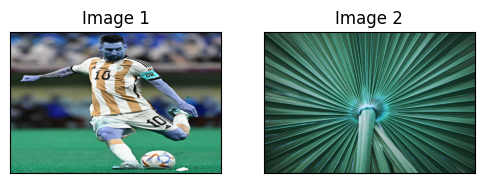

In [133]:
plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(img1, cmap='gray')
plt.title('Image 1'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img2, cmap='gray')
plt.title('Image 2'), plt.xticks([]), plt.yticks([])
plt.show()

In [134]:
# Reshape the images into long vectors (flatten the 2D images to 1D)
img1 = img1.reshape((img1.shape[0]*img1.shape[1], img1.shape[2]))
img2 = img2.reshape((img2.shape[0]*img2.shape[1], img2.shape[2]))

In [135]:
# Get the number of spectral channels (assume images are in 3D with color channels)
N = img1.shape[1]

# Initialize an array to store angles for each channel
sam_angles = np.zeros(N)

In [136]:
# Calculate the angle for each spectral channel
for i in range(N):
    # Dot product of the two vectors for channel i
    dot_product = np.dot(img1[:, i], img2[:, i])
        
    # Magnitudes (norms) of the vectors for channel i
    norm_img1 = np.linalg.norm(img1[:, i])
    norm_img2 = np.linalg.norm(img2[:, i])
        
    # Calculate the cosine of the angle and ensure it lies between -1 and 1
    cosine_angle = np.clip(dot_product / (norm_img1 * norm_img2), -1, 1)
        
    # Calculate the angle in radians and store it
    sam_angles[i] = np.arccos(cosine_angle)

In [137]:
# Print the average angle in degrees across all channels
print(np.degrees(np.mean(sam_angles)))

89.99999964190842


The above output gives almost 90 degrees, which means that images are completely dissimilar. The same process can be to assess image quality by comparing a noisy target image with its good counterpart reference image.